In [17]:
import os
path = os.path.abspath(os.getcwd())

In [18]:
%run -i common

# A. Data Import

In [19]:
# FILES

data_files = [
    'benchmark_results_p256_1',
    'benchmark_results_p256_2',
    'output_file'
]

file_path = 'data/' + data_files[1] + '.csv'

# B. Data Analysis

In [20]:
def plot_comparison(csv_file, log=False):
    # Load the CSV file
    df = pd.read_csv(csv_file)

    # Group by 'with_tag' and 'composite_value' to calculate average time
    avg_times = df.groupby(['with_tag', 'n_data'])['time'].mean().reset_index()

    # Disable LaTeX for the plot
    plt.rcParams['text.usetex'] = False
    
    # Plotting the average times for both 'with_tag' true and false
    plt.figure(figsize=(10, 6))
    
    # Switch legend tags
    labels = {True: "with tag", False: "without tag"}
    
    for tag_value in [True, False]:
        subset = avg_times[avg_times['with_tag'] == tag_value]
        plt.plot(subset['n_data'], subset['time'], marker='o', label=labels[tag_value])
    
    # Customize the plot
    plt.xlabel(r'Number of log items $l$')
    plt.ylabel(r'Average time $t$ ($s$)')
    plt.legend()
    
    # Add the legend with white background
    legend = plt.legend(title="Tag status", loc='best', fontsize='small', title_fontsize='small')
    legend.get_frame().set_facecolor('white')  # Set legend background to white
    
    plt.grid(True)
    
    # Set y-axis to logarithmic scale if log=True
    if log:
        plt.yscale('log')

    plt.show()

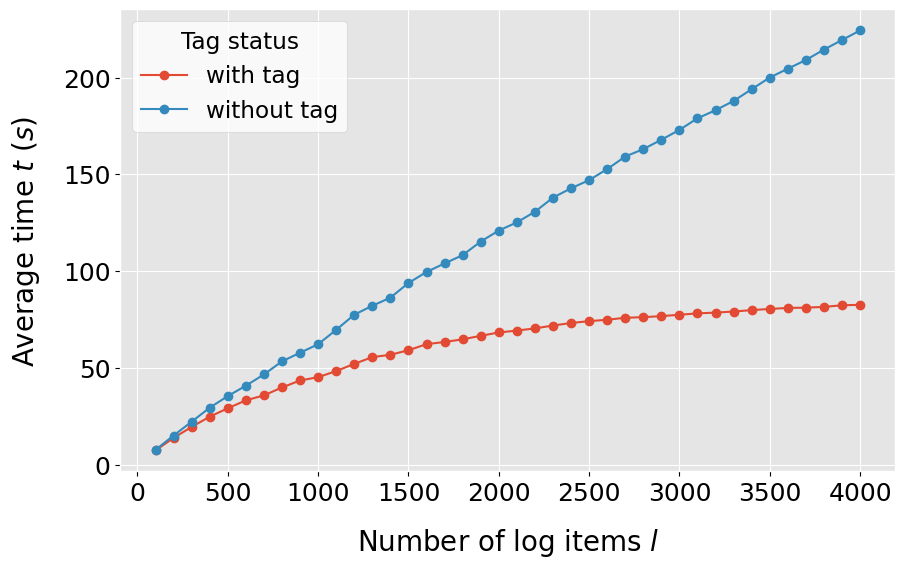

In [21]:
plot_comparison(file_path, False)